<a href="https://colab.research.google.com/github/Pragna235/IRIS-Dataset-Classification-Model/blob/main/IRIS_Data_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS Data Classification Project

Check the versions of libraries to be imported

In [2]:
# Python version
import sys
print("Python : {}".format(sys.version))
# scipy
import scipy
print("scipy : {}".format(scipy.__version__))
# numpy
import numpy
print("numpy : {}".format(numpy.__version__))
# maplotlib
import matplotlib
print("matplotlib : {}".format(matplotlib.__version__))
# pandas
import pandas
print("pandas : {}".format(pandas.__version__))
# scikit-learn
import sklearn
print("scikit-learn : {}".format(sklearn.__version__))


Python : 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]
scipy : 1.10.1
numpy : 1.23.5
matplotlib : 3.7.1
pandas : 1.5.3
scikit-learn : 1.2.2


Import all the necessary modules

In [3]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# LOADING DATA
Load the IRIS Data into your colab notebook to start working and assign appropriate attribute names

In [4]:
# UCI Machine Learning Repository is used to load the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal_length','sepal_width','petal_length','petal_width','class' ]
dataset=pandas.read_csv(url,names=names)

Print the number of rows and columns in the dataset

In [5]:
#Number of rows and columns in the dataset
print(dataset.shape)

(150, 5)


Comparatively, the IRIS Dataset has less number of rows and columns

# ANALYSING THE DATA
Print the dataset


In [6]:
#Print the dataset
print(dataset.head(30))

    sepal_length  sepal_width  petal_length  petal_width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

Get the summary of each attribute of the dataset

In [7]:
#Summary of each attribute of the dataset
print(dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Get the description of the dataset

In [35]:
# Description of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Find the number of instances that belong to each class in the dataset, i.e., find how many types of IRIS flowers are available in the dataset

In [9]:
# Number of instances that belong to each class
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# DATA VISUALIZATION

Visualize data using box plots

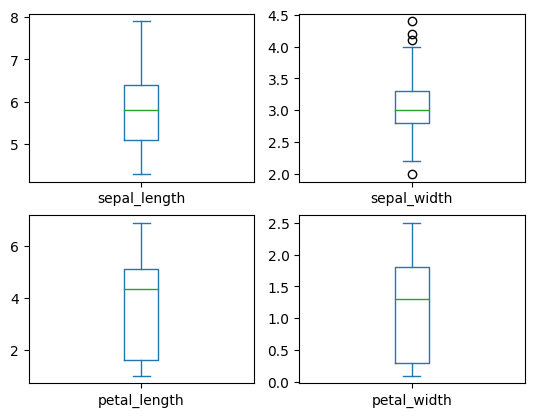

In [10]:
# Univariant Plot to understand about each attribute
# Box  and viscous plot
dataset.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()

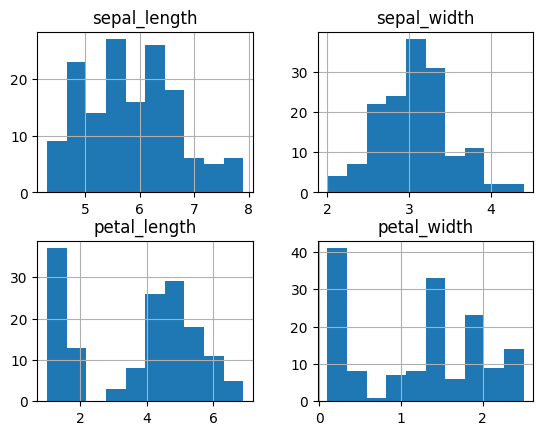

In [11]:
#Histogram
dataset.hist()
plt.show()

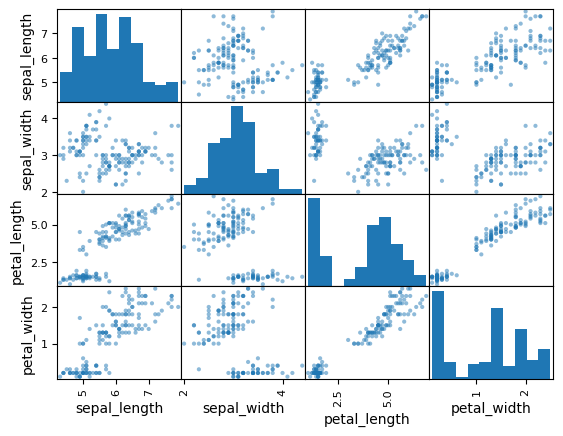

In [12]:
# Multi variant plot to understand about the relationship between different attributes
# Scatter plot
scatter_matrix(dataset)
plt.show()

# MODEL TRAINING

In [37]:
# Create a validation dataset(Training Dataset)
# Model Training
array = dataset.values
X = array[:,0:4] # all rows, all attributes except the target attribute
Y = array[:,4] # all rows, target attribute
validation_size = 0.20
seed = 6

X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

# K-FOLD Cross Validation Analysis

In [14]:
# Create a Test Harness
# 10-fold cross validation is used to test the accuracy
# 9- train, 1-test = 10
seed=6
scoring = "accuracy" #ratio of number of correctly predicted instances divided by the total number of instances in the data set * 100 - giving a percentage.

Comparing all the available classification algorithms to check which yields better accuracy and predictions

In [15]:
# Spot Check Algorithms
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

# Evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,shuffle=True,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s : %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR : 0.958333 (0.041667)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.041667)
CART : 0.950000 (0.040825)
NB : 0.966667 (0.040825)
SVM : 0.941667 (0.053359)


# Training the Model using Support Vector Machine Algorithm

In [16]:
# Support Vector Machine Algorithm
svn=SVC()
svn.fit(X_train,Y_train)

SVC()

In [17]:
# Model Evaluation
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
accuracy_score(Y_test,predictions)*100

100.0

In [18]:
confusion_matrix(Y_test,predictions)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [20]:
# A detailed classification report
print(classification_report(Y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



So, we got 100% accuracy using Support Vector Machine Algorithm.

 * Precision defines the ratio of true positives to the sum of true positive and false positives.
 * Recall defines the ratio of true positive to the sum of true positive and false negative.
 * F1-score is the mean of precision and recall value.

# Testing The Model with Foreign Data

In [21]:
# Testing the model
X_new = numpy.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


According to the data given, the model predicted the following values for the given foreign data.

# Save the model

In [22]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Training the Model using Logistic Regression Algorithm

In [23]:
# Logistic Regression Algorithm
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
y_pred

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [26]:
accuracy_score(Y_test,y_pred)*100

96.66666666666667

In [27]:
confusion_matrix(Y_test,y_pred)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]])

In [28]:
print(classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



So, using Logistic Regression, the accuracy yielded is approximately 97%.
Which tells us that, SVM did a better job than LR.

# Training using Linear Discriminant Analysis Algorithm

In [29]:
# Linear Discriminant Analysis Algorithm
lda=LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis()

In [30]:
y_predicted=lda.predict(X_test)

In [31]:
y_predicted

array(['Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor'], dtype='<U15')

In [32]:
accuracy_score(Y_test,y_predicted)*100

100.0

In [33]:
confusion_matrix(Y_test,y_predicted)

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 11]])

In [34]:
print(classification_report(Y_test,y_predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Here, the LDA ALgorithm yielded 100% accuracy in predicting the values.
<br> Therefore, SVM and LDA did a better job in predicting the type of IRIS Flowers than any other classification algorithm with an accuracy score of 100.